In [8]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
print("Dataset downloaded to:", path)

csv_path = f"{path}/US_Accidents_March23.csv"

df = pd.read_csv(csv_path, low_memory=False)

print("Shape:", df.shape)
print(df.head())

Dataset downloaded to: C:\Users\spoorthy\.cache\kagglehub\datasets\sobhanmoosavi\us-accidents\versions\13
Shape: (7728394, 46)
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False

In [9]:
cols = ["Severity", "Start_Time", "Start_Lat", "Start_Lng", 
        "Weather_Condition", "Temperature(F)", "Visibility(mi)", 
        "Wind_Speed(mph)", "Precipitation(in)", "Sunrise_Sunset"]
df = df[cols]

# Convert Start_Time to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")

# Extract useful time features
df["Hour"] = df["Start_Time"].dt.hour
df["DayOfWeek"] = df["Start_Time"].dt.day_name()

# Drop rows with too many missing values
df = df.dropna(subset=["Start_Lat", "Start_Lng", "Weather_Condition"])

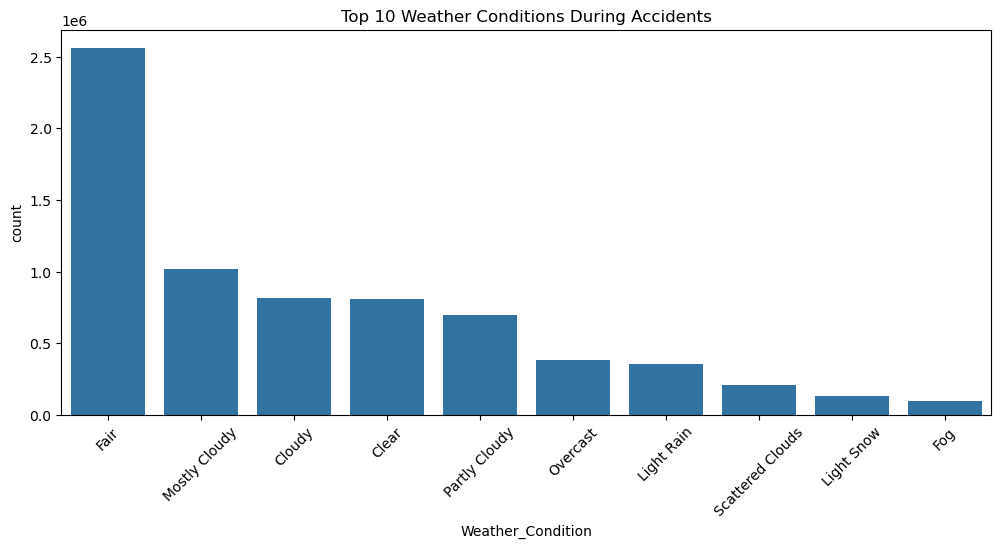

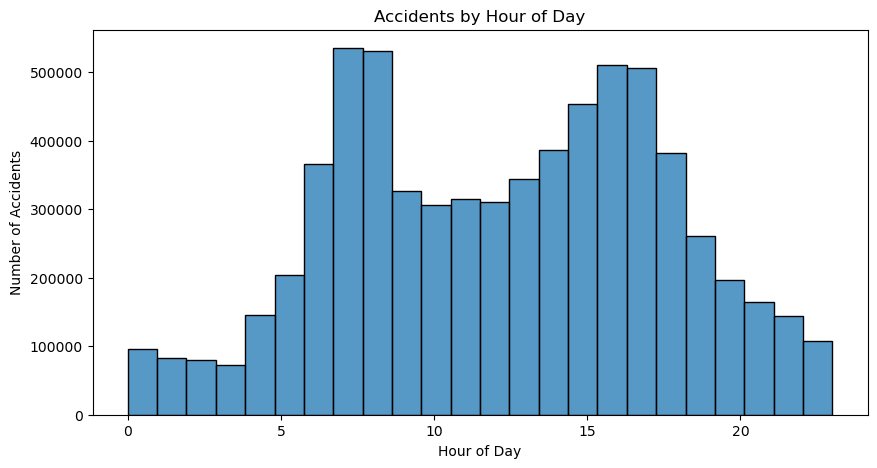

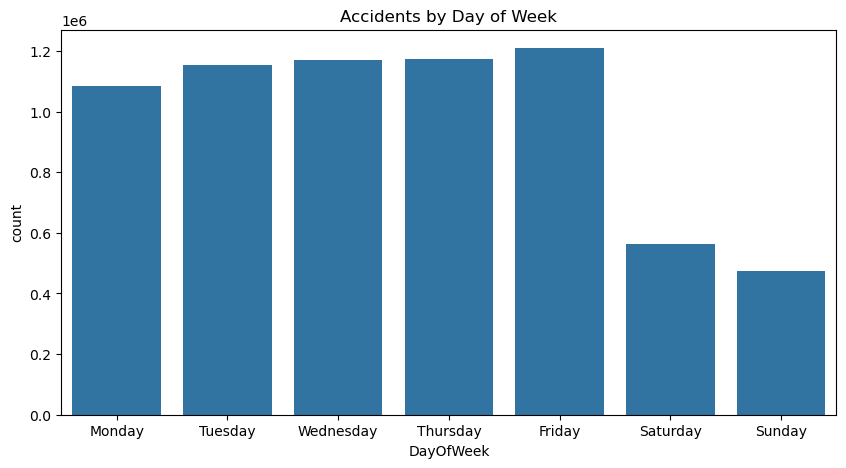

In [10]:
# a) By road/weather conditions
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="Weather_Condition", order=df["Weather_Condition"].value_counts().iloc[:10].index)
plt.title("Top 10 Weather Conditions During Accidents")
plt.xticks(rotation=45)
plt.show()

# b) By time of day (hourly pattern)
plt.figure(figsize=(10,5))
sns.histplot(df["Hour"], bins=24, kde=False)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

# c) By day of week
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="DayOfWeek", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Accidents by Day of Week")
plt.show()

In [11]:
sample_df = df.sample(2000, random_state=42)

map_center = [sample_df["Start_Lat"].mean(), sample_df["Start_Lng"].mean()]
accident_map = folium.Map(location=map_center, zoom_start=4)

for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row["Start_Lat"], row["Start_Lng"]],
        radius=2,
        color="red",
        fill=True,
        fill_opacity=0.6
    ).add_to(accident_map)

accident_map